In [1]:
import pandas as pd
import random
import os
import numpy as np
from tqdm import tqdm_notebook
from collections import Counter

from gensim.models import Word2Vec
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

path = 'TagScore_auditor.csv'
df = pd.read_csv(path)
df.columns
df.head()

,Tags,Score
0,java<android<security<hash<passwords,3
1,android<android-manifest<android-securityexcep...,4
2,javascript<reactjs<security<jwt<rails-api,3
3,spring<spring-boot<spring-security<roles,1
4,java<spring<spring-boot<spring-security<spring...,4


In [2]:
tags = list(df['Tags'].unique())
all_tags = []
for tag in tqdm_notebook(tags):
    all_tags += tag.split('<')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_41916\352278747.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tag in tqdm_notebook(tags):


  0%|          | 0/17155 [00:00<?, ?it/s]

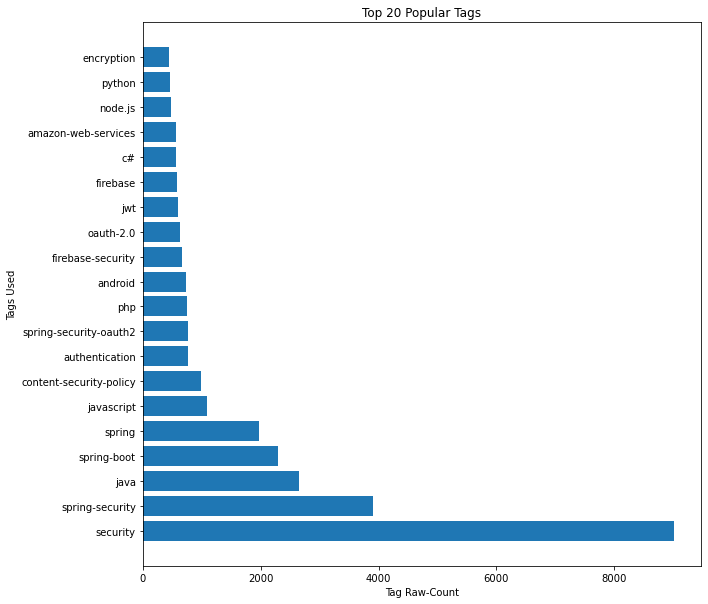

In [3]:
count_tags = Counter(all_tags)
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

plt.barh(list(tags['tag'])[:20], list(tags['count'])[:20])
plt.ylabel('Tags Used')
plt.xlabel('Tag Raw-Count')
plt.title('Top 20 Popular Tags')
plt.show()

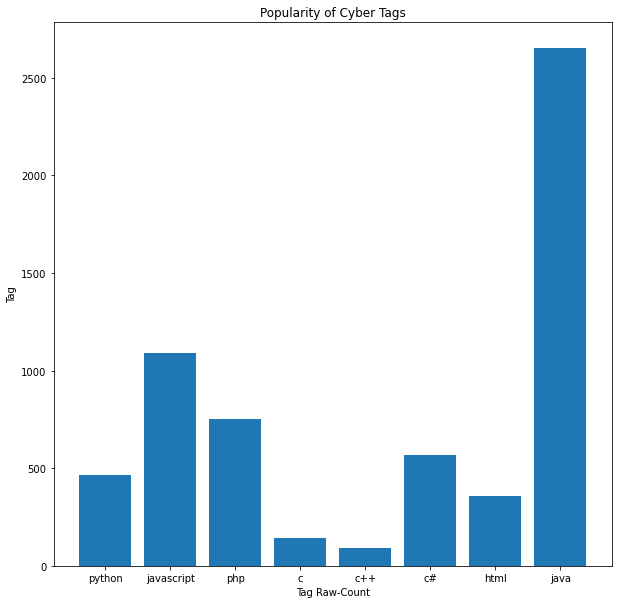

In [4]:
cyber = ['python', 'javascript', 'php', 'c', 'c++', 'c#', 'html', 'java']
x = []
y = []
for tag in cyber:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])
    
plt.bar(x, y)
plt.ylabel('Tag')
plt.xlabel('Tag Raw-Count')
plt.title('Popularity of Cyber Tags')
plt.show()

In [6]:
tag_rate = df[['Tags', 'Score']].drop_duplicates().reset_index(drop=True)
tag_rate.head()

tagRate = {}
for i in tqdm_notebook(range(len(tag_rate['Tags']))):
    for tag in tag_rate['Tags'][i].split('<'):
        try:
            tagRate[tag].append(tag_rate['Score'][i])
        except Exception:
            tagRate[tag] = [tag_rate['Score'][i]]

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_41916\1011159026.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(tag_rate['Tags']))):


  0%|          | 0/19587 [00:00<?, ?it/s]

Text(0, 0.5, 'Tag')

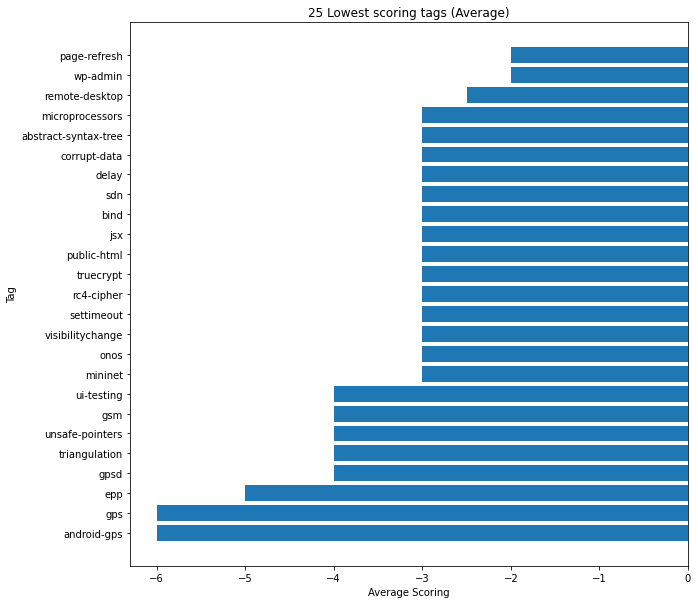

In [7]:
tagRateAvg = {}
for key in list(tagRate.keys()):
    tagRateAvg[key] = np.average(tagRate[key])
tagRateAvg = pd.DataFrame([list(tagRateAvg.keys()), list(tagRateAvg.values())])
tagRateAvg = tagRateAvg.transpose()
tagRateAvg.columns = ['Tags', 'Score']
tagRateAvg = tagRateAvg.sort_values('Score')

plt.barh(list(tagRateAvg['Tags'])[:25], list(tagRateAvg['Score'])[:25])
plt.xlabel('Average Scoring')
plt.title('25 Lowest scoring tags (Average)')
plt.ylabel('Tag')

Text(0, 0.5, 'Tag')

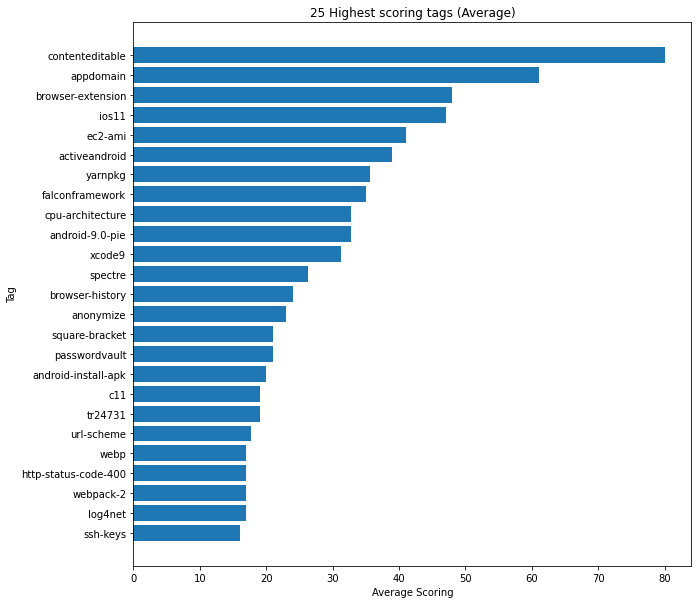

In [8]:
plt.barh(list(tagRateAvg['Tags'])[-25:], list(tagRateAvg['Score'])[-25:])
plt.xlabel('Average Scoring')
plt.title('25 Highest scoring tags (Average)')
plt.ylabel('Tag')

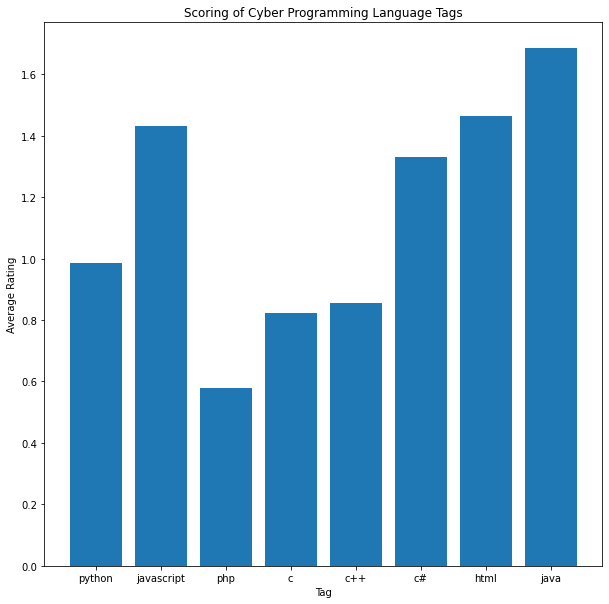

In [9]:
cyber = ['python', 'javascript', 'php', 'c', 'c++', 'c#', 'html', 'java']
x = []
y = []
for tag in cyber:
    index = list(tagRateAvg['Tags']).index(tag)
    x.append(tag)
    y.append(list(tagRateAvg['Score'])[index])
    
plt.bar(x, y)
plt.ylabel('Average Rating')
plt.xlabel('Tag')
plt.title('Scoring of Cyber Programming Language Tags')
plt.show()

Text(0.5, 1.0, 'c#')

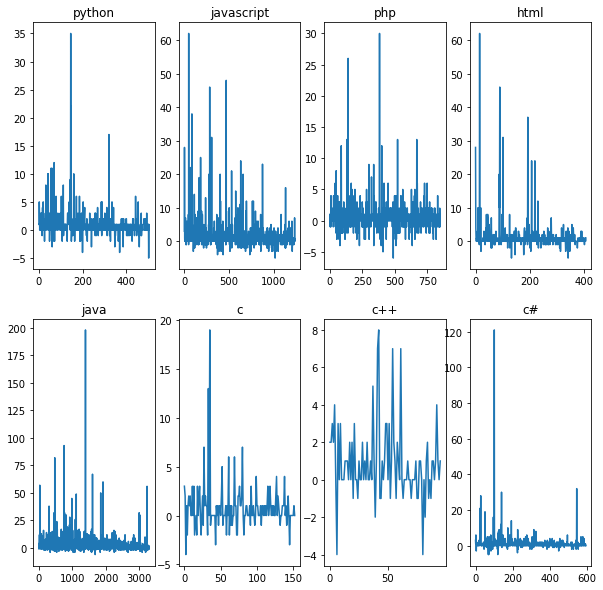

In [10]:
fig, ax = plt.subplots(2, 4)
ax[0][0].plot(tagRate['python'])
ax[0][0].set_title('python')

ax[0][1].plot(tagRate['javascript'])
ax[0][1].set_title('javascript')

ax[0][2].plot(tagRate['php'])
ax[0][2].set_title('php')

ax[0][3].plot(tagRate['html'])
ax[0][3].set_title('html')

ax[1][0].plot(tagRate['java'])
ax[1][0].set_title('java')

ax[1][1].plot(tagRate['c'])
ax[1][1].set_title('c')

ax[1][2].plot(tagRate['c++'])
ax[1][2].set_title('c++')

ax[1][3].plot(tagRate['c#'])
ax[1][3].set_title('c#')